# 基于Keras的深度学习入门实战

# 声明

- 作者：AFAN
- 时间：2024-10-10
- 微信：afan-life
- B站/知识星球：AFAN的金融科技
- 注：本分享来自于AFAN的金融科技的内部分享，未经作者明确许可，禁止转载、传播、出售或以任何其他方式使用。如发现有用户违反版权声明，对付费内容进行非法转载或传播的行为，AFAN将依法追究其法律责任，并保留追诉的权利。
- 注：AFAN的金融科技分享所有和投资相关的话题都仅供参考，不构成购买或出售所提及的投资产品的投资建议、要约或招揽。与您的特定投资目标、财务状况和特定需求无关。因此，AFAN均不承担由此信息直接或间接导致损失的责任。

In [17]:
import keras
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
!python -V

Python 3.11.5


In [5]:
sklearn.__version__

'1.3.0'

In [6]:
np.__version__

'1.24.3'

In [7]:
pd.__version__

'2.2.3'

In [8]:
matplotlib.__version__

'3.7.2'

In [9]:
keras.__version__

'3.6.0'

In [10]:
tf.__version__

'2.17.0'

- sklearn官网：https://scikit-learn.org/
- keras中文文档：https://keras-zh.readthedocs.io/
- keras官方网站：https://keras.io/

# 基础模型搭建

## 两种搭建方式

### 方式一

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

D:\software\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

D:\software\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

### 方式二

层 layer是神经网络的核心组件，是一种数据处理模块，也可以看成数据过滤器  
本例中网络包含2个Dense层，是全连接神经层，第二层是一个10路softmax层  

In [4]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

## Dropout增加

In [6]:
from keras import layers

In [7]:
model = Sequential()
model.add(Dense(32, input_dim=784))

model.add(layers.Dropout(0.5))

model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))

In [8]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

## 训练前的编译

要想训练网络，我们还需要选择编译（compile）步骤的三个参数。  
- 损失函数（loss function）：网络如何衡量在训练数据上的性能，即网络如何朝着正确的方向前进。  
- 优化器（optimizer）：基于训练数据和损失函数来更新网络的机制。   
- 在训练和测试过程中需要监控的指标（metric）：本例只关心精度，即正确分类的图像所占的比例  

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# DNN手写数字集预测

## MNIST数据介绍

MNIST是一个手写体数字的图片数据集，该数据集来由美国国家标准与技术研究所（National Institute of Standards and Technology (NIST)）发起整理，一共统计了来自250个不同的人手写数字图片，其中50%是高中生，50%来自人口普查局的工作人员。该数据集的收集目的是希望通过算法，实现对手写数字的识别。

1998年，Yan LeCun 等人发表了论文《Gradient-Based Learning Applied to Document Recognition》，首次提出了LeNet-5 网络，利用上述数据集实现了手写字体的识别。

### 数据读取

In [72]:
import numpy as np
import pandas as pd
np.random.seed(10)

In [73]:
from keras.datasets import mnist #导入MNIST模块

In [74]:
(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()

In [75]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


一个黑白图片其实就是一个一个像素构成的，这个照片的维度就是28*28，里面每个点在0~255之间

In [15]:
np.unique(train_images[0].ravel())

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

In [76]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 数据可视化

可以看一下前10张照片的可视化

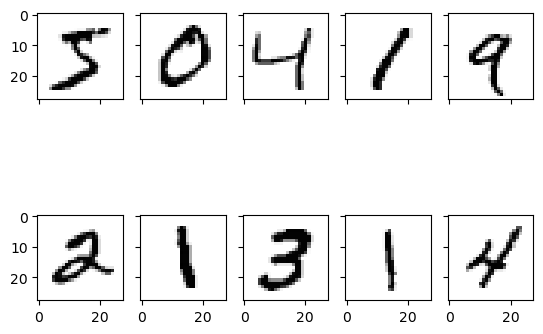

In [19]:
fig, ax = plt.subplots(
        nrows=2,
        ncols=5,
        sharex=True,
        sharey=True, )
 
ax = ax.flatten()
 
for i in range(10):
    ax[i].imshow(train_images[i], cmap='Greys', interpolation='nearest')
plt.show()

### 训练数据转换

In [77]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [78]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [82]:
train_images[0].shape

(784,)

In [79]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 模型搭建

In [24]:
from keras.models import Sequential
from keras.layers import Dense

 #蛋糕架子，后续的组件用model.add的方法
model = Sequential()

# 建立输入层和隐藏层
model.add(Dense(units=256, #隐藏层神经元个数256
                input_dim=784, #输入层784
                kernel_initializer='normal',#正态分布的随机数来初始化weight and bias
                activation='relu')) # activation function is relu
# 建立输出层
model.add(Dense(units=10, #输出层的神经元个数为10个
                kernel_initializer='normal', #正态分布的随机数来初始化weight and bias
                activation='softmax'))# 激活函数为softmax，其可将输出转化为预测的概率

D:\software\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

## 模型训练

In [27]:
model.fit(train_images, train_labels, epochs =5, batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8467 - loss: 0.5925
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1554
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0970
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9801 - loss: 0.0704
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0526


In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.9736 - loss: 0.0878


0.975600004196167

关注1：Epoch=5是指利用训练集训练5轮，之所以是一轮要跑469次，是因为总数据量和batch_size的关系

In [17]:
train_images.shape

(60000, 784)

In [20]:
round(60000 / 128)

469

关注2：loss在不断下降，准确率也在不断提升

# CNN手写数字集预测

In [83]:
from keras import layers
from keras import models

In [84]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

D:\software\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


卷积神经网络接收形状为(image_height, image_width, image_channels)的输入张量（不包括批量维度）。

本例中设置卷积神经网络处理大小为(28, 28, 1) 的输入张量，
这正是MNIST 图像的格式

为什么是conv2d是(None, 26, 26, 32) 呢？这是因为卷积核的长宽是3x3的，所以要从28 - 2 = 26

pooling层可以让长宽维度直接减半

In [85]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

将最后的输出张量［大小为(3, 3, 64)］输入到一个密集连接分类器网络中，即Dense 层的堆叠。

这些分类器可以处理1D 向量，而当前的输出是3D 张量，所以需要将3D 输出展平为1D，然后在上面添加几个Dense 层。

In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

如你所见，在进入两个Dense 层之前，形状(3, 3, 64) 的输出被展平为形状(576,) 的  
向量。
下面我们在MNIST 数字图像上训练这个卷积神经网络。我们将复用第2 章MNIST 示例中
的很多代码。

在MNIST 图像上训练卷积神经网络

In [34]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path = './mnist.npz')
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [35]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8290 - loss: 0.5355
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9824 - loss: 0.0569
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9893 - loss: 0.0343
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9918 - loss: 0.0270
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9935 - loss: 0.0207


In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: 0.0371


0.9919000267982483

前面DNN测试精度为97.5%，但这个简单CNN的测试精度达到了99.2%

# RNN文本IMBD情感预测

In [66]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb

## IMDB数据介绍

IMDB影评数据集是自然语言处理领域中广泛使用的情感分析数据集之一。该数据集包含了大量电影评论，并标记了每条评论的情感倾向（正面或负面）。通过使用这个数据集，我们可以训练模型来自动判断影评的情感倾向。

### 数据读取

In [38]:
max_features = 20000
# 在此数量的单词之后剪切文本（取最常见的 max_features 个单词）
maxlen = 80
batch_size = 32

In [39]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [55]:
max([len(i) for i in x_train])

2494

In [40]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [58]:
pd.Series(y_train).value_counts()

1    12500
0    12500
Name: count, dtype: int64

### ID转文字

In [44]:
word2id_dict = imdb.get_word_index()

In [49]:
list(word2id_dict.items())[:5]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951)]

In [42]:
id2word_dict = {v:k for k,v in word2id_dict.items()}

In [50]:
list(id2word_dict.items())[:5]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani')]

In [62]:
idx = 0
# 这个数据集的ID需要偏移3个位置，前面是预留给特殊字符的
' '.join([id2word_dict.get(j - 3, '?') for j in x_train[idx]]), y_train[idx]

("? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what 

这部电影选角非常出色，地点风景故事方向每个人都非常适合他们所扮演的角色，你可以想象在那里罗伯特？是一位出色的演员，现在是同一位导演？父亲和我来自同一个苏格兰岛屿，所以我喜欢这部电影与这部电影有真正的联系，整部电影中的诙谐评论都很棒，太精彩了，以至于我在这部电影上映后就买了它，并会推荐给大家观看和飞钓太棒了，最后真的哭了，太伤心了，你知道如果你在电影中哭泣的话他们会说什么，那一定很好，这绝对也是对扮演诺曼和保罗的两个小男孩的祝贺，他们只是？聪明的孩子经常被排除在表扬名单之外，我认为是因为扮演他们长大的明星对整部电影来说是如此重要，但这些孩子太棒了，应该因为他们所做的事情而受到赞扬，你不认为吗？整个故事是如此可爱，因为它是真实的，并且毕竟是与我们所有人分享的某人的生活

In [63]:
idx = 1
' '.join([id2word_dict.get(j - 3, '?') for j in x_train[idx]]), y_train[idx]

("? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then",
 0)

大头发、大胸部、糟糕的音乐和巨大的安全别针，这些词最能描述这部可怕的电影，我喜欢俗气的恐怖电影，我看过数百部，但这一定是有史以来最糟糕的电影之一，情节是纸薄的，可笑，表演令人厌恶，剧本完全可笑，最好的是最后与警察的对决，以及他如何找出凶手是谁，写得太可怕了，衣服既恶心又有趣，头发很大很多胸部弹力男人穿着那些炫耀他们的剪裁 T 恤？令人作呕的是，男人实际上穿着它们，音乐只是？几乎在每个场景中一遍又一遍地播放的垃圾都有垃圾音乐胸部和？运走尸体，健身房还不关门？抛开开玩笑不谈，这是一部真正糟糕的电影，其唯一的魅力就是回顾 80 年代的灾难，并对当时的一切有多么糟糕开怀大笑

### 训练数据转换

In [64]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


## 模型训练

### RNN

In [69]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# 尝试使用不同的优化器和优化器配置
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [70]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.5164 - loss: 0.7039 - val_accuracy: 0.5298 - val_loss: 0.6829
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.5954 - loss: 0.6590 - val_accuracy: 0.6243 - val_loss: 0.6307
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.7166 - loss: 0.5506 - val_accuracy: 0.6951 - val_loss: 0.5783
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7798 - loss: 0.4618 - val_accuracy: 0.6834 - val_loss: 0.6227
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8077 - loss: 0.4279 - val_accuracy: 0.6942 - val_loss: 0.6112
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7623 - loss: 0.4785 - val_accuracy: 0.6555 - val_loss: 0.6598
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7949 - loss: 0.4306 - val_accuracy: 0.7140 - val_loss: 0.6216
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8199 - loss: 

### LSTM

In [38]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# 尝试使用不同的优化器和优化器配置
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 80, 128)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,075,141 (30.80 MB)

 Trainable params: 2,691,713 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,383,428 (20.54 MB)

In [38]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.7183 - loss: 0.5376 - val_accuracy: 0.8279 - val_loss: 0.3946
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.8759 - loss: 0.3083 - val_accuracy: 0.8324 - val_loss: 0.4174
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.9191 - loss: 0.2148 - val_accuracy: 0.8284 - val_loss: 0.4278
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.9434 - loss: 0.1521 - val_accuracy: 0.8238 - val_loss: 0.4790
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.9610 - loss: 0.1095 - val_accuracy: 0.8146 - val_loss: 0.5547
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.9739 - loss: 0.0772 - val_accuracy: 0.8130 - val_loss: 0.6280
Ep